As a first step, we install iesopt (add it to our environment)

!pip install iesopt

Then, we import it

In [2]:
import iesopt
import pandas as pd

INFO:iesopt:Integrated Energy System Optimization (IESopt)
INFO:iesopt:    © 2021 - now:  AIT Austrian Institute of Technology GmbH
INFO:iesopt:    Documentation: https://ait-energy.github.io/iesopt
INFO:iesopt:    Target for juliapkg: 'C:\Users\ReiszP\OneDrive - AIT\Projects\iesopt-trainings\twinvector-summerschool-2025\.iesopt'
INFO:iesopt:Checking Julia environment
INFO:iesopt:Disabling SSL verification to prevent problems; this may be unsafe


[juliapkg] Found dependencies: c:\users\reiszp\onedrive - ait\projects\iesopt-trainings\twinvector-summerschool-2025\.iesopt\juliapkg.json
[juliapkg] Found dependencies: c:\users\reiszp\onedrive - ait\projects\iesopt-trainings\twinvector-summerschool-2025\.venv\lib\site-packages\juliacall\juliapkg.json
[juliapkg] Found dependencies: c:\users\reiszp\onedrive - ait\projects\iesopt-trainings\twinvector-summerschool-2025\.venv\lib\site-packages\juliapkg\juliapkg.json
[juliapkg] Locating Julia =1.11.5
[juliapkg] Using Julia 1.11.5 at C:\Users\ReiszP\.julia\juliaup\julia-1.11.5+0.x64.w64.mingw32\bin\julia.exe
[juliapkg] Using Julia project at c:\Users\ReiszP\OneDrive - AIT\Projects\iesopt-trainings\twinvector-summerschool-2025\.venv\julia_env
[juliapkg] Writing Project.toml:
             [deps]
             JuMP = "4076af6c-e467-56ae-b986-b466b2749572"
             IESopt = "ed3f0a38-8ad9-4cf8-877e-929e8d190fe9"
             HiGHS = "87dc4568-4c63-4d18-b0c0-bb2238e4078b"
             PythonC

INFO:iesopt:Julia environment ready, loading Julia
INFO:iesopt:    Using default sysimage
INFO:iesopt:    Executable: C:\Users\ReiszP\.julia\juliaup\julia-1.11.5+0.x64.w64.mingw32\bin\julia.exe
INFO:iesopt:    Project: c:\Users\ReiszP\OneDrive - AIT\Projects\iesopt-trainings\twinvector-summerschool-2025\.venv\julia_env
INFO:iesopt:Julia setup complete
INFO:iesopt:Importing Julia modules:
INFO:iesopt:    IESopt
INFO:iesopt:    JuMP
INFO:iesopt:Loaded versions: py=2.8.0, jl=2.8.0


## Running the optimization model
Run the model, including some "top-level" settings. 
- This example uses the day-ahead price with a markup of +10.0 EUR/MWh for buying
- and allows selling at the day-ahead price, with a markup of +5.0 EUR/MWh.

Other alternative parameters could, e.g., be:
- `dict(price_electricity_buy = "dayahead_price@data", price_electricity_sell = 10.0)`: which models buying at the day-ahead price and selling (feed-in) at a fixed price of 10.0 EUR/MWh.
- `dict(..., price_hydrogen_buy = 150.0)` which models buying hydrogen at a fixed price of 150.0 EUR/MWh.

In [3]:
model = iesopt.run(
    "opt/config.iesopt.yaml",
    parameters=dict(
        price_electricity_buy="10.0 + dayahead_price@data", # it elevates the cost if I buy => +"dayahead_price"
        price_electricity_sell="5.0 - dayahead_price@data", # it reduces the costs (+some offset) -"dayahead_price"
    ), # 5 euros are some fixed "feedin-costs"
)
model._model

A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: JuMP.AffExpr
├ num_variables: 28000
├ num_constraints: 50402
│ ├ JuMP.AffExpr in MOI.EqualTo{Float64}: 11199
│ ├ JuMP.AffExpr in MOI.GreaterThan{Float64}: 5601
│ ├ JuMP.AffExpr in MOI.LessThan{Float64}: 11202
│ └ JuMP.VariableRef in MOI.GreaterThan{Float64}: 22400
└ Names registered in the model: none

NameError: name 'result_df' is not defined

15-element Vector{IESopt._CoreComponent}:
 :: IESopt.Profile ::
├ name: sell_heat
├ carrier: IESopt.Carrier("heat", nothing, nothing)
├ node_from: grid_heat
├ node_to: nothing
└ mode: destroy
 :: IESopt.Unit ::
├ name: battery.discharging
├ inputs: Dict{IESopt.Carrier, String}(IESopt.Carrier("electricity", nothing, nothing) => "battery.storage")
├ outputs: Dict{IESopt.Carrier, String}(IESopt.Carrier("electricity", nothing, nothing) => "grid_electricity")
└ unit_commitment: off
 :: IESopt.Node ::
├ name: battery.storage
├ carrier: IESopt.Carrier("electricity", nothing, nothing)
├ has_state: true
└ nodal_balance: enforce
 :: IESopt.Profile ::
├ name: pv
├ carrier: IESopt.Carrier("electricity", nothing, nothing)
├ node_from: nothing
├ node_to: grid_electricity
└ mode: ranged
 :: IESopt.Profile ::
├ name: buy_heat
├ carrier: IESopt.Carrier("heat", nothing, nothing)
├ node_from: nothing
├ node_to: grid_heat
└ mode: create
 :: IESopt.Node ::
├ name: grid_heat
├ carrier: IESopt.Carrier("heat"

## Inspest the results.

We also save them to a csv format.

In [5]:
result_df = model.results.to_pandas()
print("Result columns:", result_df.columns)
print( model.get_components() )
result_df[result_df["snapshot"].isnull()]

Result columns: Index(['snapshot', 'component', 'fieldtype', 'field', 'value', 'mode'], dtype='object')
IESopt._CoreComponent[:: IESopt.Profile ::
├ name: sell_heat
├ carrier: IESopt.Carrier("heat", nothing, nothing)
├ node_from: grid_heat
├ node_to: nothing
└ mode: destroy, :: IESopt.Unit ::
├ name: battery.discharging
├ inputs: Dict{IESopt.Carrier, String}(IESopt.Carrier("electricity", nothing, nothing) => "battery.storage")
├ outputs: Dict{IESopt.Carrier, String}(IESopt.Carrier("electricity", nothing, nothing) => "grid_electricity")
└ unit_commitment: off, :: IESopt.Node ::
├ name: battery.storage
├ carrier: IESopt.Carrier("electricity", nothing, nothing)
├ has_state: true
└ nodal_balance: enforce, :: IESopt.Profile ::
├ name: pv
├ carrier: IESopt.Carrier("electricity", nothing, nothing)
├ node_from: nothing
├ node_to: grid_electricity
└ mode: ranged, :: IESopt.Profile ::
├ name: buy_heat
├ carrier: IESopt.Carrier("heat", nothing, nothing)
├ node_from: nothing
├ node_to: grid_heat
└

,snapshot,component,fieldtype,field,value,mode
8400,None,sell_heat,obj,cost,0.000000,primal
30801,None,buy_heat,obj,cost,0.000000,primal
47602,None,buy_electricity,obj,cost,547796.471443,primal
56003,None,sell_hydrogen,obj,cost,0.000000,primal
70004,None,battery.storage,con,last_state_lb,0.000000,dual
70005,None,battery.storage,con,last_state_ub,-0.000000,dual
103606,None,sell_electricity,obj,cost,-6724.026272,primal
112007,None,buy_hydrogen,obj,cost,0.000000,primal


We also look at the meaning of single columns.

In [6]:
print(f"- Snapshots:", result_df["snapshot"].unique())
print(f"\n- Components and attributes  :", result_df["component"].unique())
print("\n- Field types:", result_df["fieldtype"].unique())
print("\n- Fields:", result_df["field"].unique())
print("\n- Values:", result_df["value"][0:5])
print("\n- Modes:", result_df["mode"].unique()   )

- Snapshots: ['t1' 't2' 't3' ... 't2799' 't2800' None]

- Components and attributes  : ['sell_heat' 'battery.discharging' 'buy_heat' 'grid_heat' 'battery'
 'buy_electricity' 'sell_hydrogen' 'battery.storage' 'pv' 'grid_hydrogen'
 'load' 'sell_electricity' 'buy_hydrogen' 'battery.charging'
 'grid_electricity']

- Field types: ['var' 'exp' 'obj' 'con']

- Fields: ['aux_value' 'value' 'cost' 'conversion' 'in_electricity'
 'out_electricity' 'conversion_ub' 'injection' 'nodalbalance' 'setpoint'
 'state' 'state_ub' 'last_state_lb' 'last_state_ub' 'state_lb' 'value_lb'
 'value_ub']

- Values: 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: value, dtype: float64

- Modes: ['primal' 'dual']


In [7]:
print((model.results.overview))

result_df.to_csv("opt/out/results.csv")

<bound method Results.overview of An IESopt result object:
	source: an IESopt model
	attributes: none
	model results: yes
	custom results: no
	input fields: none
	info fields: none>


## Visualize the results.
You can use iespopt's built-in results. For this, refer to [tryout.py](tryout.py).

We show how to look at the data, that is connected to a specific component

#### dual vs primal
- all results with ``_dual`` indicate the shadow prices, i.e. how the objective value would change if the variable is increased by one unit.
- ``_primal`` indicates the actual "quantity" of the variable at this point in time, e.g. storage charging exp in primal indicates the amount of electricity stored in the memory
- in this snapshot

#### Field types
- ``var`` = variable. Variable are values of the decision variable
- ``exp`` = expression. expressions are results from composite parts, e.g. ``exp = input1 + input2 - output1``
- ``obj`` = objective => objective value. ``objective`` is the objective function, so all results with "objective" are values that contribute directly to the objective function, e.g. objective cost
- ``con`` = constraint



In [11]:
import matplotlib.pyplot as plt

def plot_power_over_time(component_power, snapshot_time_vector, plot_title="", figure=None):
    if figure is None:
        fig = plt.figure(figsize=(6, 3))
    plt.plot(snapshot_time_vector, component_power, linestyle='-')
    plt.xlabel("Time (snapshot)")
    plt.ylabel("Power")
    plt.title(plot_title)
    plt.grid(True)
    plt.xticks(rotation=45,ticks=[snapshot_time_vector[0], snapshot_time_vector[len(snapshot_time_vector)//2] ,snapshot_time_vector[-1]])
    plt.tight_layout(); plt.show()
    
def get_power_of_component(iesopt_result_df, component_name):
    comp_df = result_df[iesopt_result_df["component"] == component_name]
    return comp_df.query("mode == 'primal' and fieldtype == 'exp'")["value"]

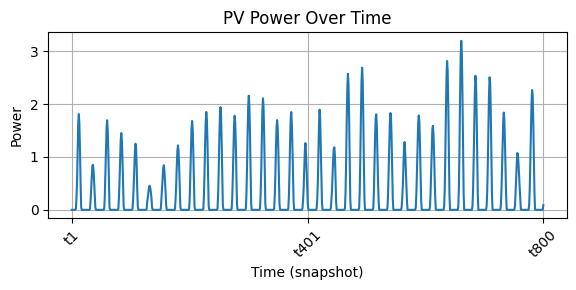

In [12]:
snapshot_time_vector = result_df["snapshot"].unique()
power = get_power_of_component(iesopt_result_df = result_df, component_name = "pv")
plot_power_over_time(power[0:800], snapshot_time_vector[0:800], plot_title="PV Power Over Time")


In [13]:
from iesopttools import RDB

rdb = RDB()
entry = rdb.add_entry(model)
entry

Look at the carriers being connected to the electric grid.

In [14]:
entry.query("carrier", "node = 'grid_electricity'" ) 

┌─────────────────────┬───────────┬─────────────┬──────────────────┬───────────┬─────────────────┐
│      component      │ direction │   carrier   │       node       │ fieldtype │      field      │
│       varchar       │  varchar  │   varchar   │     varchar      │  varchar  │     varchar     │
├─────────────────────┼───────────┼─────────────┼──────────────────┼───────────┼─────────────────┤
│ sell_electricity    │ in        │ electricity │ grid_electricity │ exp       │ value           │
│ buy_electricity     │ out       │ electricity │ grid_electricity │ exp       │ value           │
│ battery.charging    │ in        │ electricity │ grid_electricity │ exp       │ in_electricity  │
│ pv                  │ out       │ electricity │ grid_electricity │ exp       │ value           │
│ battery.discharging │ out       │ electricity │ grid_electricity │ exp       │ out_electricity │
│ load                │ in        │ electricity │ grid_electricity │ exp       │ value           │
└─────────

Pandas(component='battery.charging', direction='in', carrier='electricity', node='grid_electricity', fieldtype='exp', field='in_electricity')


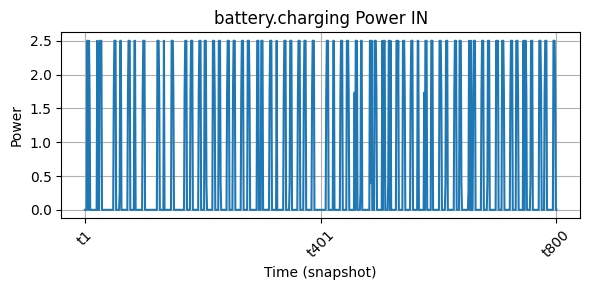

Pandas(component='load', direction='in', carrier='electricity', node='grid_electricity', fieldtype='exp', field='value')


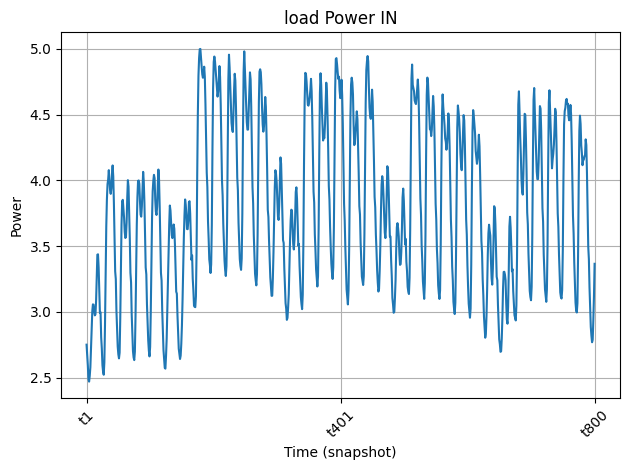

Pandas(component='sell_electricity', direction='in', carrier='electricity', node='grid_electricity', fieldtype='exp', field='value')


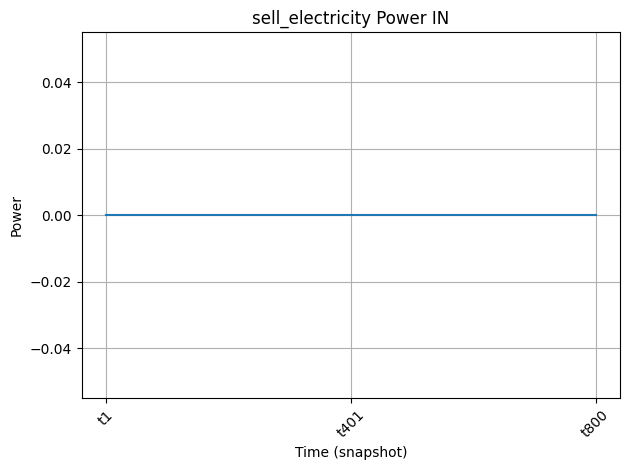

In [15]:
fig = plt.figure(figsize=(6, 3))
for asset in entry.query("carrier", "node = 'grid_electricity' AND direction = 'in'"):
    print(asset)
    powerflow = entry.select(asset).to_df()["value"]
    plot_power_over_time(powerflow[0:800], snapshot_time_vector[0:800], plot_title=f"{asset[0]} Power IN", figure="fig")

Pandas(component='battery.discharging', direction='out', carrier='electricity', node='grid_electricity', fieldtype='exp', field='out_electricity')


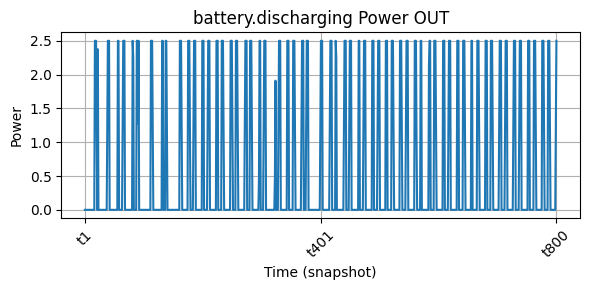

Pandas(component='buy_electricity', direction='out', carrier='electricity', node='grid_electricity', fieldtype='exp', field='value')


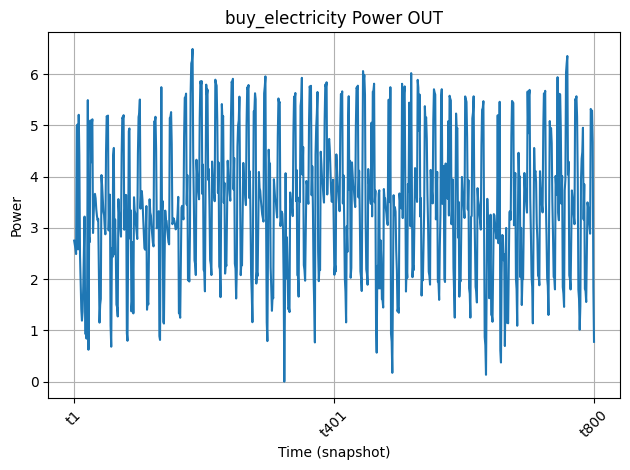

Pandas(component='pv', direction='out', carrier='electricity', node='grid_electricity', fieldtype='exp', field='value')


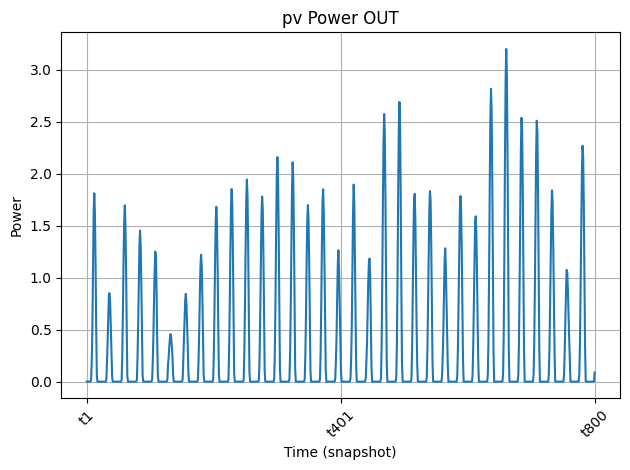

In [ ]:
fig = plt.figure(figsize=(6, 3))
for asset in entry.query("carrier", "node = 'grid_electricity' AND direction = 'out'"):
    print(asset)
    powerflow = entry.select(asset).to_df()["value"]
    plot_power_over_time(powerflow[0:800], snapshot_time_vector[0:800], plot_title=f"{asset[0]} Power OUT", figure=fig)